In [12]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
path = '/kaggle/input/brain-tumor-dataset/'

In [3]:
labels = ['no','yes']

In [4]:
print("pre-processing data\n")

image_data=[]
label_data=[]
image_size=150

for i in labels:
    data_path=os.path.join("/kaggle/input/brain-tumor-dataset/","Brain MRI",i)
    for m in tqdm(os.listdir(data_path)):
        image=cv2.imread(os.path.join(data_path,m))
        image=cv2.resize(image,(image_size,image_size))
        
        image_data.append(image)
        label_data.append(i)
        
image_data=np.array(image_data)
label_data=np.array(label_data)

pre-processing data



100%|██████████| 33/33 [00:00<00:00, 90.77it/s] 


In [5]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [7]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

In [10]:
num_classes = 2

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 10
epochs = 50
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,          
    restore_best_weights=True )
history = model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 8s/step - accuracy: 0.4502 - loss: 1.8278 - val_accuracy: 0.8333 - val_loss: 0.6543
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7740 - loss: 0.5783 - val_accuracy: 0.7500 - val_loss: 0.9302
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8755 - loss: 0.6060 - val_accuracy: 0.8333 - val_loss: 0.7818
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9253 - loss: 0.2440 - val_accuracy: 0.6667 - val_loss: 1.9418
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9108 - loss: 0.4863 - val_accuracy: 0.8333 - val_loss: 1.1152
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9253 - loss: 0.2977 - val_accuracy: 0.9167 - val_loss: 0.4723
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 1.0000 - loss: 0.0342 - val_accuracy: 0.8333 - val_loss: 0.3015
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9751 - loss: 0.0752 - val_accuracy: 0.9167 - val_loss: 0.284

In [14]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9751 - loss: 0.0340
Train Loss:  0.030620550736784935
Train Accuracy:  0.97826087474823


In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8333 - loss: 0.1802
Test Loss:  0.18024446070194244
Test Accuracy:  0.8333333134651184


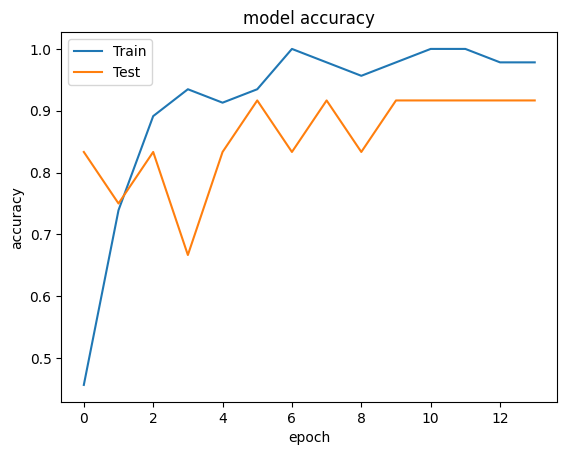

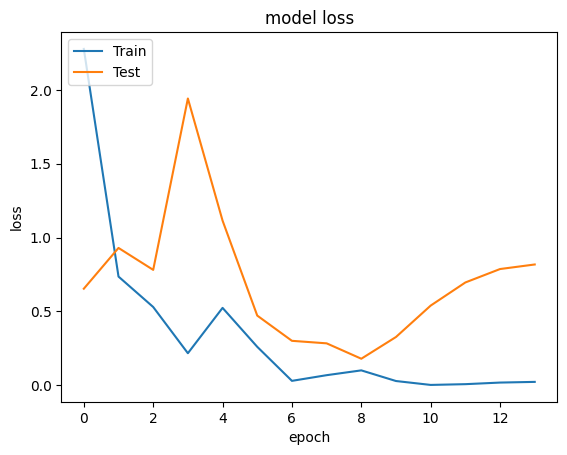

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[4 1]
 [1 6]]


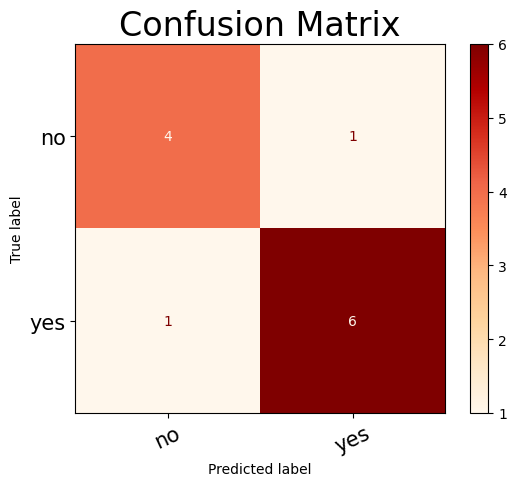

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.86      0.86      0.86         7

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [21]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))